For Exploratory Data Analysis



In [2]:
### setup 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [6]:
df = pd.read_csv('/workspaces/covid-19-prediction/data/covid_19_clean_complete.csv')

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Display basic info
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

print("\nFirst 5 Rows:")
display(df.head())

print("\nMissing Values:")
display(df.isnull().sum())

Data Shape: (49068, 10)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB

First 5 Rows:


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa



Missing Values:


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [7]:
# Data Cleaning and Feature Engineering
# Fill missing values in 'Province/State' with a placeholder
df['Province/State'].fillna('N/A', inplace=True)

# Sort data to ensure correct feature calculation
df.sort_values(['Country/Region', 'Province/State', 'Date'], inplace=True)

# Create a unique identifier for each region
df['Region'] = df['Country/Region'] + '_' + df['Province/State']

# Feature 1: Days since the first case in that specific region
df['days_since_first_case'] = df.groupby('Region').cumcount()

# We will use the country-level data for simplicity in our model
country_df = df.groupby(['Country/Region', 'Date']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Lat': 'first', # Use the first reported latitude
    'Long': 'first' # Use the first reported longitude
}).reset_index()

# Feature 2: Days since first case for each country
country_df.sort_values(['Country/Region', 'Date'], inplace=True)
country_df['days_since_first_case'] = country_df.groupby('Country/Region').cumcount()

display(country_df.head())

/tmp/ipykernel_4634/4058344069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province/State'].fillna('N/A', inplace=True)


,Country/Region,Date,Confirmed,Deaths,Recovered,Lat,Long,days_since_first_case
0,Afghanistan,2020-01-22,0,0,0,33.93911,67.709953,0
1,Afghanistan,2020-01-23,0,0,0,33.93911,67.709953,1
2,Afghanistan,2020-01-24,0,0,0,33.93911,67.709953,2
3,Afghanistan,2020-01-25,0,0,0,33.93911,67.709953,3
4,Afghanistan,2020-01-26,0,0,0,33.93911,67.709953,4


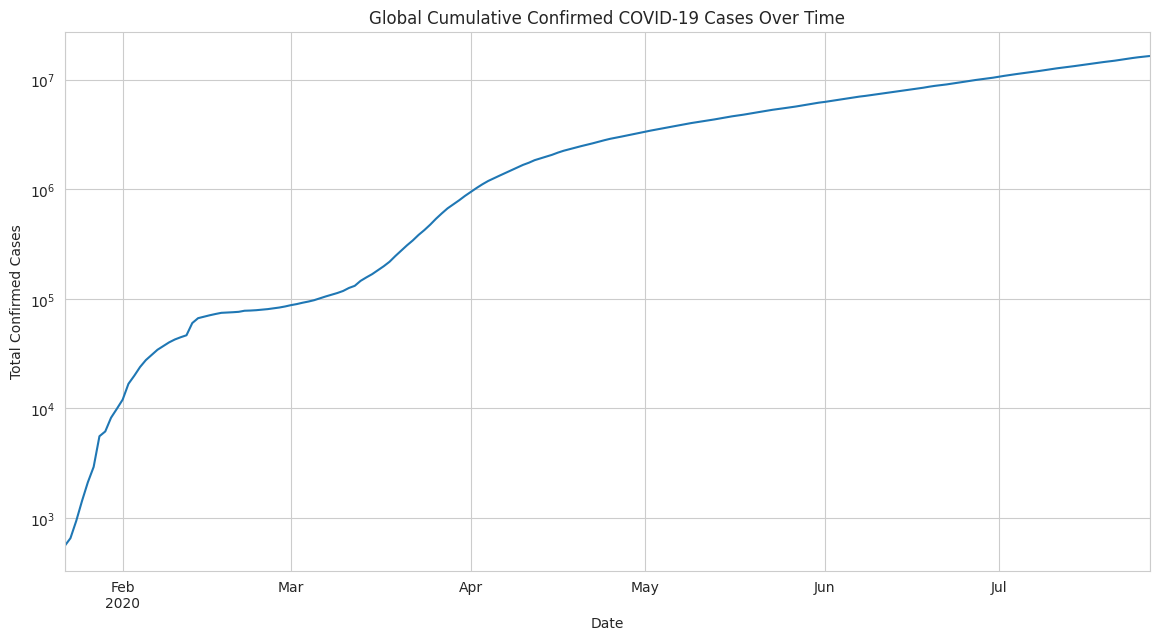

/tmp/ipykernel_4634/518649452.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')


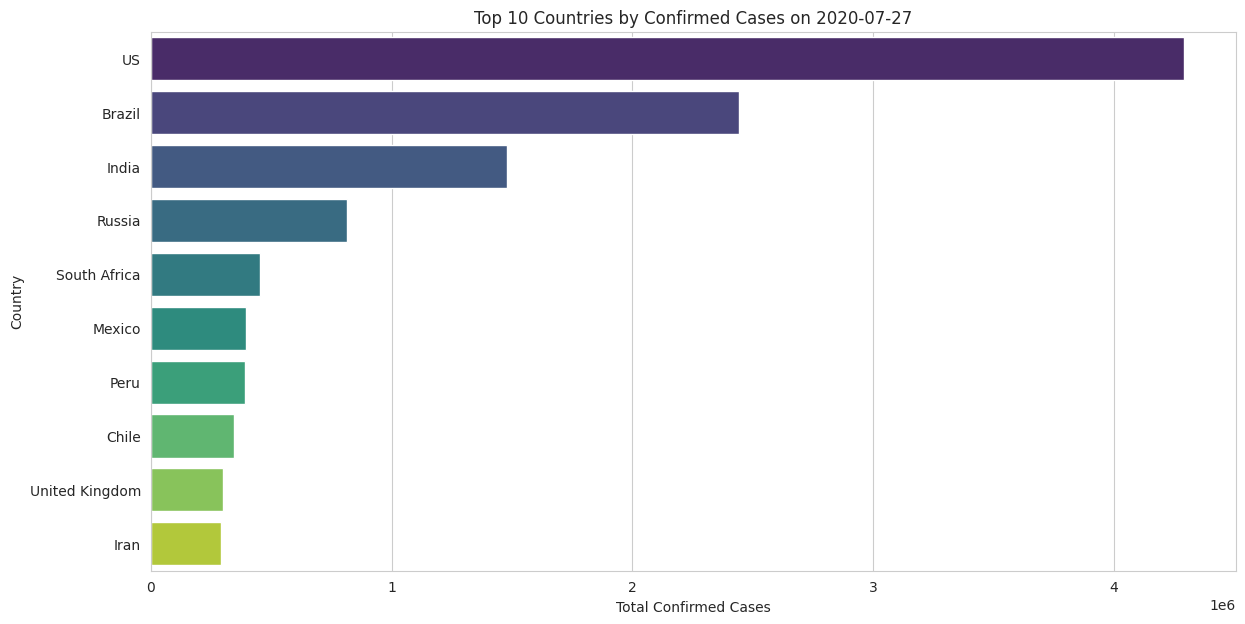

In [8]:
# Exploratory Data Analysis (EDA)

# Plot 1: Global confirmed cases over time
global_cases = country_df.groupby('Date')['Confirmed'].sum()
plt.figure(figsize=(14, 7))
global_cases.plot()
plt.title('Global Cumulative Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.yscale('log') # Log scale for better visualization
plt.show()

# Plot 2: Top 10 countries with the highest number of cases (as of the last date in dataset)
latest_date = country_df['Date'].max()
top_countries = country_df[country_df['Date'] == latest_date].sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title(f'Top 10 Countries by Confirmed Cases on {latest_date.strftime("%Y-%m-%d")}')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

Linear Regression R² Score: 0.0367
Random Forest R² Score: 0.9997


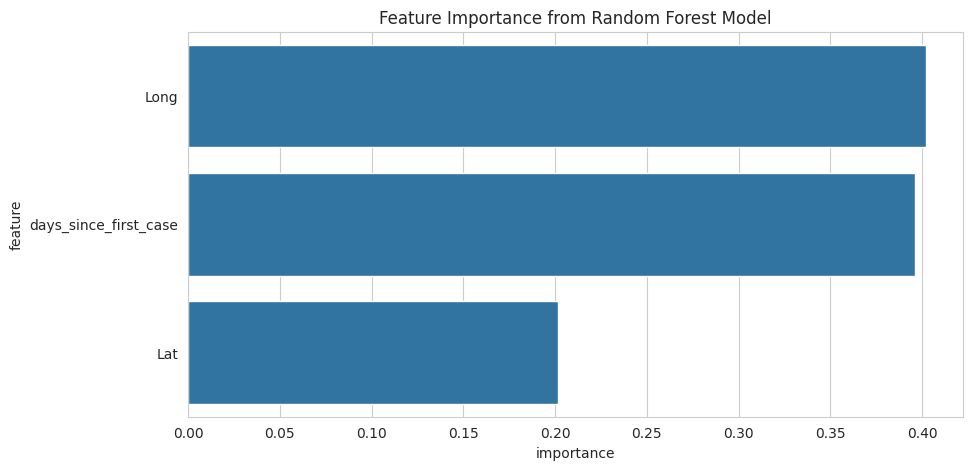

,feature,importance
2,Long,0.402315
0,days_since_first_case,0.396027
1,Lat,0.201658


Bad pipe message: %s [b' q=0.9, image/avif, image/webp, image/apng, */*; q=0.8, application/signed-exchange; v=b3; q=0.7\r\nHost: loc', b'host:45051\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, lik']
Bad pipe message: %s [b'Gecko) Chrome/142.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nAccept-Language: en']
Bad pipe message: %s [b'U, en-GB; q=0.9, en-US; q=0.8, en; q=0.7\r\nCa', b'e-Control: max-age=0\r\nReferer: https://fuzzy-space-train-gpvp7575pwq2v96j.github.dev/\r\nX-Request-I']
Bad pipe message: %s [b' e1bc110c606ca81185876b92312e316a\r\nX-Real-IP: 10.241.0.36\r\nX-Forwar']
Bad pipe message: %s [b'd-Port: 443\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-Scheme: https\r\nsec-fetch-site: same-si', b'\r\nsec-fetch-mode: navigate\r\nsec-fetch-dest: document\r\nsec-ch-ua: "Chromium";v="142", "Google Chrome";v="142", "Not_', b'Brand";v="99"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-ua-platform: "Window']
Bad pipe message: %

In [ ]:
#  Feature Importance and Model Selection

# Define features (X) and target (y)
features = ['days_since_first_case', 'Lat', 'Long']
target = 'Confirmed'

X = country_df[features]
y = country_df[target]

# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression (as a baseline)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(f"Linear Regression R² Score: {r2_score(y_test, lr_pred):.4f}")

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest R² Score: {r2_score(y_test, rf_pred):.4f}")

# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()

display(feature_importance_df)